# Visualization of M&M output

A prototype to plot various M&M output information.

## Load a sample M&M output data-set

In [1]:
result_file = 'small_data_100_mixture01_1_oracle_generator_1_mnm_mixture01_1.rds'
meta_file = 'small_data_100_mixture01_1.pkl'

In [2]:
dat = readRDS(result_file)$result
names(dat)

[1] "alpha"           "mu"              "mu2"             "KL"             
 [5] "lbf"             "sigma2"          "V"               "elbo"           
 [9] "niter"           "fitted"          "coef"            "null_index"     
[13] "mixture_weights" "lfsr"            "intercept"       "sets"           
[17] "pip"             "m_init"

## SuSiE plot

We can directly call SuSiE plot function. Since it is simulated data we can add the true causal effects to it.

In [3]:
truth = dscrutils::read_dsc(meta_file)$meta$true_coef
true_pos = as.integer(apply(truth, 1, sum) != 0)
true_idx = which(truth != 0, arr.ind = TRUE)
true_idx

row,col
149,1
394,1
786,1
149,2
394,2
786,2
149,3
394,3
786,3
149,4


In [4]:
truth[which(truth!=0,arr.ind=T)[,1],]

0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165
0.4118993,0.3934502,0.08806096,-0.07230793,0.05004165


In [5]:
dat$coef[-1,][true_idx]

[1]  5.540905e-05  8.971842e-03  4.446600e-02  3.703633e-05  5.543688e-03
 [6]  3.073868e-02  1.267170e-05  2.001803e-03  8.153000e-03 -1.549788e-05
[11] -1.666104e-03 -7.444080e-03  7.121739e-06  8.384508e-04  5.577863e-03

In [6]:
pdf('susie_plot_demo.pdf', width=10, height=5)
susieR::susie_plot(dat,y='PIP', main = 'Default SuSiE plot for cross-condition PIP', xlab = 'SNP positions', add_legend = T, b=true_pos)
dev.off()

png 
  2

> susie_plot_demo.pdf (11.0 KiB):

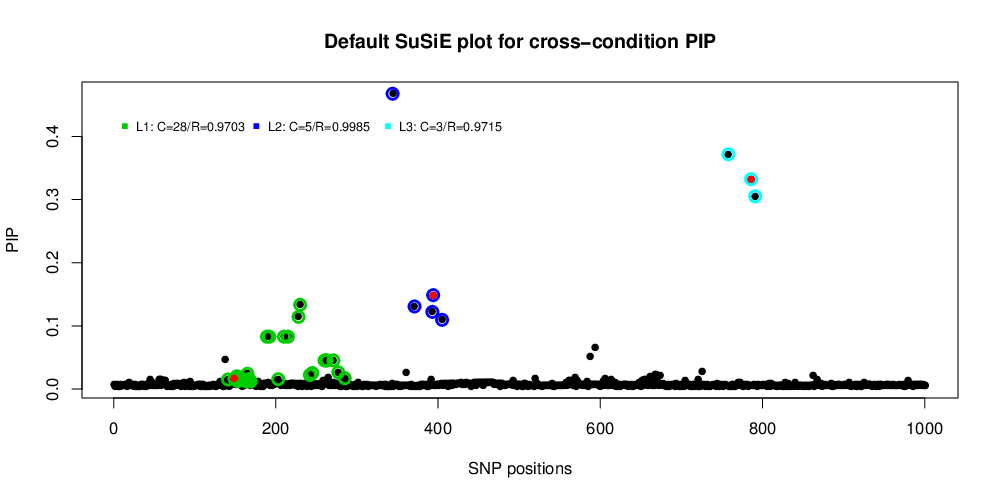

In [7]:
%preview susie_plot_demo.pdf -s png --dpi 100

## Bubble plot for estimated effect size

Effect size will be the color of the bubble:

In [17]:
p = mmbr::mmbr_plot(dat)

Suggested PDF canvas width: 18 height: 4.5 


In [18]:
pdf('bubble_demo.pdf', width = p$width, height = p$height)
print(p$plot)
dev.off()

png 
  2

> bubble_demo.pdf (6.4 KiB):

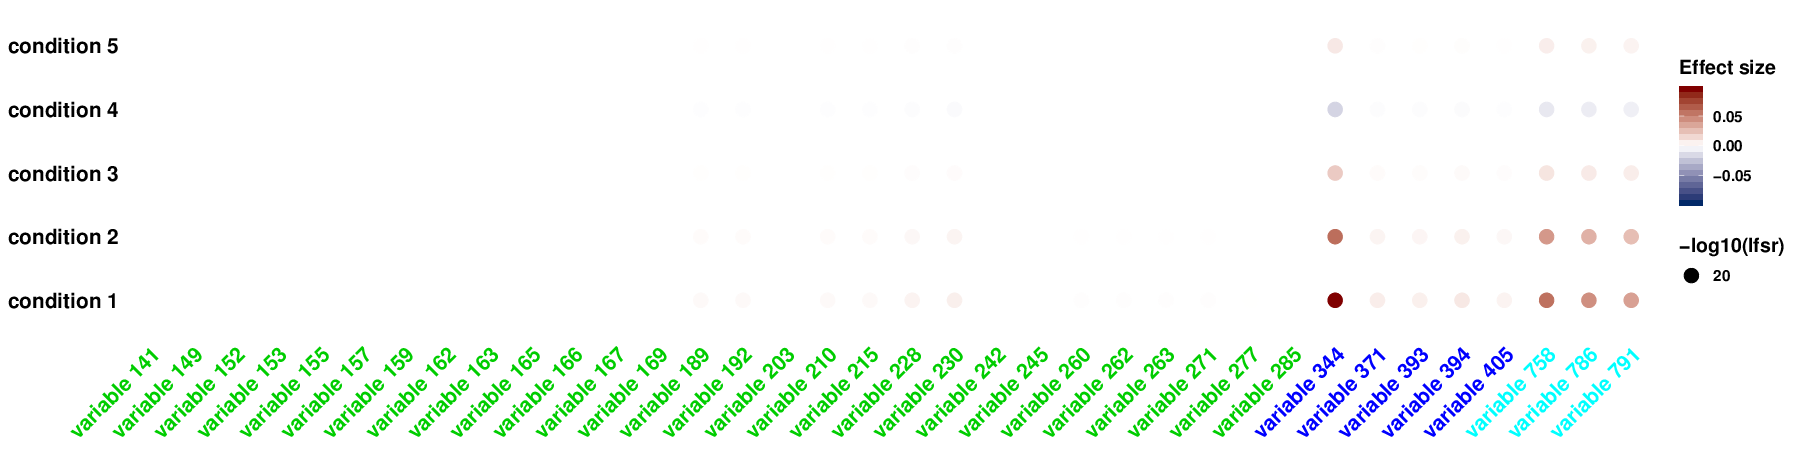

In [19]:
%preview bubble_demo.pdf -s png --dpi 100

In [20]:
p = mmbr::mmbr_plot(dat, cs_only=F)

Suggested PDF canvas width: 500.5 height: 4.5 


In [21]:
pdf('bubble_demo_full.pdf', width = p$width, height = p$height)
print(p$plot)
dev.off()

png 
  2

> bubble_demo_full.pdf (31.8 KiB):

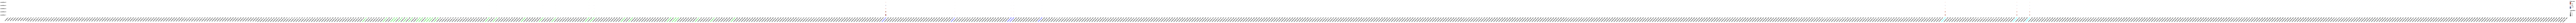

In [22]:
%preview bubble_demo_full.pdf -s png --dpi 100